In [154]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from pandas import DataFrame
import pickle
import os
import math

from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis


## Con datos de los videos 

Datos de los ejercicios de los pacientes

In [155]:
filenames_patients = {
    "cruz_ej1": [
        "cruz_ej1_0",
        "cruz_ej1_3",
        "cruz_ej1_4",
        "cruz_ej1_8",
        "cruz_ej1_12",
        "cruz_ej1_13",
        "cruz_ej1_15",
        "cruz_ej1_21",
        "cruz_ej1_24",
        "cruz_ej1_27",
        "cruz_ej1_35",
        "cruz_ej1_40",
        "cruz_ej1_44",
        "cruz_ej1_48",
        "cruz_ej1_52",
        "cruz_ej1_55",
        "cruz_ej1_57",
        ],
    "cruz_ej2" : [
        "cruz_ej2_1",
        "cruz_ej2_9",
        "cruz_ej2_5",
        "cruz_ej2_14",
        "cruz_ej2_19",
        "cruz_ej2_22",
        "cruz_ej2_23",
        "cruz_ej2_25",
        "cruz_ej2_26",
        "cruz_ej2_28",
        "cruz_ej2_29",
        "cruz_ej2_36",
        "cruz_ej2_37",
        "cruz_ej2_41",
        "cruz_ej2_45",
        "cruz_ej2_47",
        "cruz_ej2_49",
        "cruz_ej2_53",
        "cruz_ej2_60",
    ],
    "cruz_ej3" : [
        "cruz_ej3_2",
        "cruz_ej3_6",
        "cruz_ej3_7",
        "cruz_ej3_10",
        "cruz_ej3_11",
        "cruz_ej3_16",
        "cruz_ej3_17",
        "cruz_ej3_18",
        "cruz_ej3_20",
        "cruz_ej3_43",
        "cruz_ej3_59",
    ],
    "cruz_ej4" : [
        "cruz_ej4_30",
        "cruz_ej4_31",
        "cruz_ej4_32",
        "cruz_ej4_33",
        "cruz_ej4_34",
        "cruz_ej4_38",
        "cruz_ej4_39",
        "cruz_ej4_42",
        "cruz_ej4_46",
        "cruz_ej4_50",
        "cruz_ej4_51",
        "cruz_ej4_54",
        "cruz_ej4_56",
        "cruz_ej4_58",
    ],
    "pelota1" : [
        "pelota1_4",
        "pelota1_7",
        "pelota1_0",
        "pelota1_1",
        "pelota1_11",
        "pelota1_14",
        "pelota1_17",
        "pelota1_20",
        "pelota1_23",
        "pelota1_24",
        "pelota1_28",
        "pelota1_30",
        "pelota1_31",
    ],
    "pelota2": [
        "pelota2_2",
        "pelota2_5",
        "pelota2_8",
        "pelota2_12",
        "pelota2_15",
        "pelota2_18",
        "pelota2_21",
        "pelota2_29",
        "pelota2_32",
    ]
}

Archivos que contienen una ejecución correcta de los ejercicios.

In [156]:
filenames_correct = {
    "cruz_ej2" : [
        "josemi_cruz2"
    ],
    "cruz_ej3" : [
        "josemi_cruz3",
        "joselu_cruz3"
    ],
    "cruz_ej4" : [
        "josemi_cruz4",
    ],
    "pelota1" : [
        "josemi_pelota1",
        "joselu_pelota1",
        "gadea_pelota1"
    ],
    "pelota2" : [
        "josemi_pelota2",
        "joselu_pelota2",
        "gadea_pelota2"
    ]
}

In [157]:
'''
Datos
'''

def get_filenames_patients(exercise: str, df = True):
    data_path = "../datos/"
    path = data_path + "DataFrames"
    extension = ".df"
    if not df:
        path = data_path + "CSV"
        extension = ".csv"
    
    sufix = ".pos"
    dataframes = []
    for i in filenames_patients[exercise]:
        actual_df = path + os.sep + i + sufix + extension
        dataframes.append(actual_df)
    return dataframes

def get_filenames_profesionals(exercise: str):
    path = "../datos/NuestrosProcesados"
    sufix = ".mp4.pos"
    dataframes = []
    for i in filenames_correct[exercise]:
        actual_df = path + os.sep + i + sufix
        dataframes.append(actual_df)
    return dataframes
    

In [158]:
import PosicionVF
from PosicionVF import Posicion

def open_csv(csv_name):
    mycsv = pd.read_csv(csv_name)
    mycsv = mycsv.dropna(subset=mycsv.columns.values)
    return mycsv

def open_dataframe(df_name):
    df: DataFrame
    with open(df_name, 'rb') as fp:
            df = pd.read_pickle(fp)
    df = df.dropna(subset=df.columns.values)
    return df

def open_numpy(numpy_name):
    file = None
    with open(numpy_name, 'rb') as fp:
        file = pickle.load(fp)
    
    new_file = []
    for line in file:
        temp = Posicion(line)
        temp = vars(temp)
        #temp = dict(temp)
        new_file.append(temp)
    new_file = pd.DataFrame(new_file)
    new_file = new_file.dropna(subset=new_file.columns.values)
    return new_file


In [159]:
body = ['nariz', 'cuello', 'hombroI', 'hombroD',
       'codoI', 'codoD', 'manoI', 'manoD', 'caderaI', 'caderaD',
       'caderaM', 'rodillaI', 'rodillaD', 'tobilloI', 'tobilloD']

In [160]:
dataframes = get_filenames_patients("pelota1")
dataframe_name_1 = dataframes[0]
my_dataframes1 = open_dataframe(dataframe_name_1)

dataframe_name_2 = dataframes[1]
my_dataframes2 = open_dataframe(dataframe_name_2)
#my_csv2 = my_csv1.copy()

#### Con puntos del cuerpo

In [161]:
def get_position(df, body_part):
    x = df.loc[:, body_part + "_x"]
    y = df.loc[:, body_part + "_y"] 
    return x, y

def set_position(df, body_part, positions):
    df.loc[:, body_part + "_x"] = positions[0]
    df.loc[:, body_part + "_y"] = positions[1] 

def get_positions_from_df(df):
    positions = []
    positionsx = []
    positionsy = []
    for part in body:
        x, y = get_position(df, part)
        positionsx.append(x) 
        positionsy.append(y)
    
    positions.append(positionsx)
    positions.append(positionsy)
    positions = np.array(positions).reshape(2, len(body))
    return positions

def set_positions_from_df(df, positions):
    x, y = positions
    for i in range(len(x)):
        set_position(df, body[i], (x[i], y[i]))
    return df

def plot_point(positions, show: bool = True):
    x, y = positions
    plt.scatter(x,y, marker='o')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Pose')

    if show:
        plt.show()

Distancia entre dos sequencias

Sin normalizar
1 = [[849.02356 264.8972 ]
 [762.3198  148.27655]
 [764.16156 107.84765]
 [725.79535 119.71929]
 [850.6941  305.5988 ]
 [852.99536 307.02728]
 [844.7415  319.6171 ]
 [925.4367  184.27635]
 [938.31195 149.78781]
 [926.06134 204.14024]]
2=  [[875.6724  324.08286]
 [751.091   135.12155]
 [865.058   318.80026]
 [857.97516 304.4671 ]
 [858.4983  309.3259 ]
 [919.00555 251.98898]
 [925.9817  180.4731 ]
 [871.14374 307.977  ]
 [870.17334 324.59073]
 [914.13556 180.53241]]
Normalizados
1 = [[0.3064046  0.09559889]
 [0.27511403 0.05351161]
 [0.2757787  0.0389212 ]
 [0.2619327  0.04320556]
 [0.30700746 0.11028772]
 [0.30783796 0.11080325]
 [0.30485925 0.1153468 ]
 [0.33398136 0.0665036 ]
 [0.33862793 0.05405701]
 [0.3342068  0.07367229]]
2 = [[0.30306926 0.11216471]
 [0.25995177 0.04676542]
 [0.2993956  0.11033642]
 [0.29694423 0.10537572]
 [0.2971253  0.10705735]
 [0.3180668  0.08721311]
 [0.32048124 0.06246154]
 [0.30150187 0.10659049]
 [0.30116603 0.11234049]
 [0.3163813  0.062

0.15174023686277144

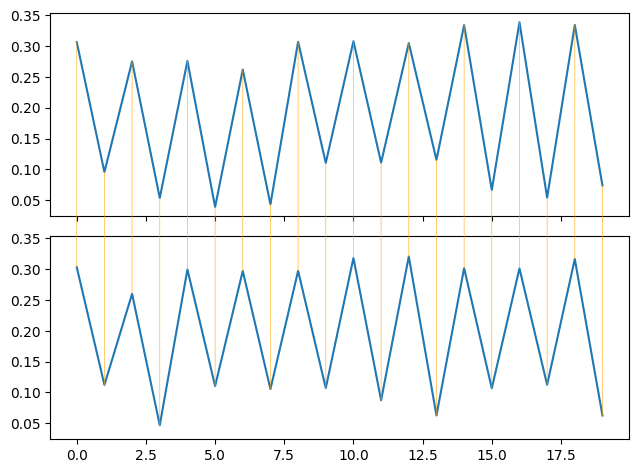

In [162]:
part= "manoI"
angles1 = get_position(my_dataframes1, part)
angles2 = get_position(my_dataframes2, part)

angles1 = np.array(angles1).transpose()
angles2 = np.array(angles2).transpose()

#positions1 = positions1[[0, 10, 100, 300, 301, 400],:]
#positions2 = positions2[[0, 1, 10, 30, 401, 405],:]
angles1 = angles1[:1000:100,:]
angles2 = angles2[:2000:200,:]

print("Sin normalizar")
print("1 =", angles1)
print("2= ", angles2)

angles1 = angles1/np.linalg.norm(angles1)
angles2 = angles2/np.linalg.norm(angles2)

print("Normalizados")
print("1 =",angles1)
print("2 =",angles2)

angles1 = angles1.reshape(2*len(angles1),)
angles1 = angles1/np.linalg.norm(angles1)

angles2 = angles2.reshape(2*len(angles2),)
angles2 = angles2/np.linalg.norm(angles2)

print("En una dimension")
print("1 = ", angles1)
print("2 = ", angles2)

path = dtw.warping_path(angles1, angles2)
#np.set_printoptions(precision=3)
print(path)
dtwvis.plot_warping(angles1, angles2, path)
dtw.distance(angles1, angles2)

In [163]:
def normalize(positions):
    #print(np.linalg.norm(positions))
    normalized = positions/np.linalg.norm(positions)
    return normalized

def dtwdis(positions1, positions2,i,j):
    positions1 = positions1.reshape(2*i,)
    positions1 = normalize(positions1)
    
    positions2 = positions2.reshape(2*j,)
    positions2 = normalize(positions2)
    
    return dtw.distance_fast(positions1, positions2)

def distance_dtw(points1, points2):
    scores = []
    for part in body:
        positions1 = np.array(get_position(points1, part), dtype=float).transpose()
        positions2 = np.array(get_position(points2, part), dtype=float).transpose()
        positions1 = normalize(positions1)
        positions2 = normalize(positions2)
        scores.append(dtwdis(positions1, positions2, len(positions1), len(positions2)))
    return 1 - np.mean(scores)


In [164]:
print(distance_dtw(my_dataframes1, my_dataframes2))

0.551312513654356


#### Con ángulos

In [165]:
angles_names = [
    'angCuelloI',
    'angCuelloD', 
    'angCodoI', 
    'angCodoD', 
    'angHombroI', 
    'angHombroD',
    'angCaderaI', 
    'angCaderaD', 
    'angCaderaTorsoI', 
    'angCaderaTorsoD',
    'angRodillaI', 
    'angRodillaD'
    ]

In [166]:
def get_angle(df, angle_name):
    angle = df.loc[:, angle_name] 
    return angle

def get_angles_from_df(df):
    angles = []
    for i in angles_names:
        angles.append(df.loc[:,i])
    angles = np.array(angles)
    return angles


En este caso se van a usar los angulos del codo izquierdo.  

In [167]:
part= "angCodoI"
angles1 = get_angle(my_dataframes1, part)
angles2 = get_angle(my_dataframes2, part)

print(angles1)
print(angles2)

0      351.123406
1      351.141971
2      350.536350
3      350.431351
4      350.536184
          ...    
995    294.015475
996    196.297673
997    202.547460
998    103.576984
999    104.573372
Name: angCodoI, Length: 999, dtype: float64
0       213.708003
1       213.636177
2       209.764334
3       207.795573
4       207.000853
           ...    
2115    133.522289
2116    129.774687
2117    130.937240
2118    123.528192
2119    103.570878
Name: angCodoI, Length: 2120, dtype: float64


Se normalizan los angulos

In [168]:
angles1 = np.array(angles1).transpose()
angles2 = np.array(angles2).transpose()

#positions1 = positions1[[0, 10, 100, 300, 301, 400]]
#positions2 = positions2[[0, 1, 10, 30, 401, 405]]
angles1 = angles1[:1000:10]
angles2 = angles2[:2000:20]

#print("Sin normalizar")
#print("1 =", angles1)
#print("2= ", angles2)

angles1 = angles1/np.linalg.norm(angles1)
angles2 = angles2/np.linalg.norm(angles2)

#print("Normalizados")
#print("1 =",angles1)
#print("2 =",angles2)

Se calculan las distancias

[(0, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 3), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 4), (13, 4), (14, 5), (15, 6), (16, 7), (17, 7), (18, 8), (19, 9), (20, 10), (21, 10), (22, 11), (22, 12), (22, 13), (22, 14), (23, 15), (24, 16), (24, 17), (24, 18), (24, 19), (24, 20), (24, 21), (24, 22), (24, 23), (25, 24), (26, 25), (27, 26), (28, 27), (29, 28), (30, 29), (31, 29), (32, 29), (33, 29), (34, 29), (35, 29), (36, 30), (37, 31), (37, 32), (37, 33), (37, 34), (37, 35), (37, 36), (37, 37), (37, 38), (37, 39), (38, 40), (39, 40), (40, 40), (41, 40), (42, 40), (43, 40), (44, 40), (45, 40), (46, 40), (47, 40), (48, 40), (49, 40), (50, 40), (51, 40), (52, 40), (53, 40), (54, 40), (55, 40), (56, 40), (57, 40), (58, 40), (59, 40), (60, 40), (61, 40), (62, 41), (63, 42), (64, 43), (65, 44), (66, 45), (67, 46), (68, 47), (69, 48), (70, 49), (71, 49), (72, 49), (73, 49), (74, 50), (74, 51), (75, 52), (76, 53), (77, 53), (78, 53), (79, 54), (79, 55), (79, 56), (79, 57), (79, 58),

0.2643466341331614

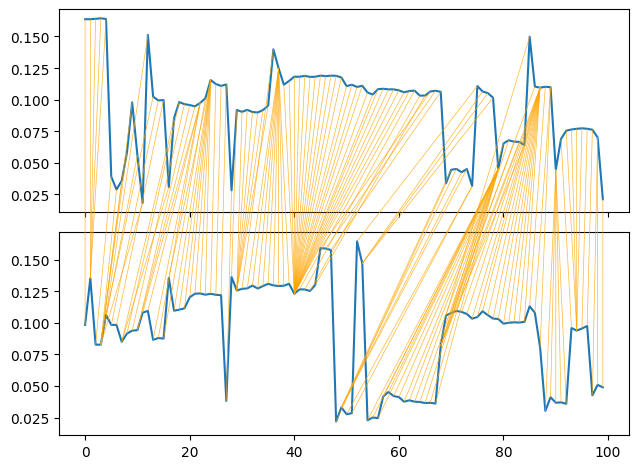

In [169]:
path = dtw.warping_path(angles1, angles2)
#np.set_printoptions(precision=3)
print(path)
dtwvis.plot_warping(angles1, angles2, path)
dtw.distance(angles1, angles2)

In [170]:
def normalize_angles(angles):
    normalized = angles/360
    #normalized = angles/np.linalg.norm(angles)
    #print("max = ", np.max(normalized))
    #print(angles)
    return normalized

def dtwdis_angles(angles1, angles2):
    a = dtw.distance_fast(angles1, angles2)
    #print(a)
    return a

def distance_dtw_angles_with_distances(points1, points2):
    distances = []
    for angle_name in angles_names:
        angles1 = np.array(get_angle(points1, angle_name)).transpose()
        #print(angles1)
        #print(np.linalg.norm(angles1))
        angles2 = np.array(get_angle(points2, angle_name)).transpose()
        angles1 = normalize_angles(angles1)
        #print(angles1)
        angles2 = normalize_angles(angles2)

        actual_distance = dtwdis_angles(angles1, angles2)
        #print(angle_name, " ", actual_distance)
        
        distances.append(actual_distance)
        
    distance = np.mean(distances)
    #print(distance)
    score = 1 - distance
    return distances, score

def distance_dtw_angles(points1, points2):
    score = distance_dtw_angles_with_distances(points1, points2)[1]
    return score

In [171]:
print(distance_dtw_angles(my_dataframes1, my_dataframes2))

-0.8652928290851696


## Comparacion de ejercicios

### Caso  ejercicios de ejercicios de pacientes

#### Caso  ejercicios de mismo tipo de ejercicio

Como primer caso se va a usar el ejercicio cruz_ej1

In [172]:
dataframes1 = get_filenames_patients("cruz_ej1")

csv1 = dataframes1[0]
csv2 = dataframes1[1]

cruz_ej1_1 = open_dataframe(csv1)
cruz_ej1_2 = open_dataframe(csv2)

La puntuacion usando los puntos es la siguiente.

In [173]:
distance_points = distance_dtw(cruz_ej1_1, cruz_ej1_2)
print(distance_points)

0.7869016135742792


Y usando los angulos

In [174]:
distance_angles = distance_dtw_angles(cruz_ej1_1, cruz_ej1_2)
print(distance_angles)
print(distance_dtw_angles_with_distances(cruz_ej1_1, cruz_ej1_2)[0])

0.48922223352079397
[1.559519681490663, 1.559519996413262, 0.9335002818089095, 0.41303930170161945, 0.23642060917160201, 0.3603592711745849, 0.16814658247815095, 0.16230899704958063, 0.12987809684908339, 0.12987824595549674, 0.26585346566691115, 0.21090866799060856]


#### Caso ejercicios de distintos tipos

En este caso se usan los anteriores y cruz_ej3 y pelota2

In [175]:
dataframes2 = get_filenames_patients("cruz_ej3")
dataframes3 = get_filenames_patients("pelota2")

dataframe3 = dataframes2[0]
dataframe4 = dataframes3[0]

cruz_ej3 = open_dataframe(dataframe3)
pelota2 = open_dataframe(dataframe4)

In [176]:
print("Puntos")
print(distance_dtw(cruz_ej1_2, cruz_ej3))
print(distance_dtw(cruz_ej1_1, pelota2))
print(distance_dtw(cruz_ej1_2, pelota2))

Puntos
0.5463199280105417
0.7048678930680388
0.8185833432995313


In [177]:
print("Angulos")
print(distance_dtw_angles(cruz_ej1_2, cruz_ej3))
print(distance_dtw_angles(cruz_ej1_1, pelota2))
print(distance_dtw_angles(cruz_ej1_2, pelota2))

Angulos
0.3124587183263694
-2.1233082461195285
-1.842078896517719


In [178]:
print("Distancias de los angulos")
print(distance_dtw_angles_with_distances(cruz_ej1_2, cruz_ej3)[0])
print(distance_dtw_angles_with_distances(cruz_ej1_1, pelota2)[0])
print(distance_dtw_angles_with_distances(cruz_ej1_2, pelota2)[0])

Distancias de los angulos
[2.1394538142883017, 2.1394537729018537, 1.0075849271666737, 0.6139119945824858, 0.2759958417752513, 0.4261428139631714, 0.27804078334988475, 0.2984900085459184, 0.17212590719094975, 0.17212630149618244, 0.5108730053758419, 0.21629620944705352]
[1.8038790681868286, 1.8038791012881117, 4.533206721042407, 4.65236753961056, 8.555242519778327, 9.860877912303458, 1.1231856731878136, 1.3346875731975543, 0.7113674326086901, 0.7113676451307965, 1.2993218844390395, 1.090315882660757]
[1.2623333011432292, 1.2623334511438897, 3.771400302264326, 4.640321187496085, 8.230598651655882, 8.50454978622225, 1.1039202772668149, 1.3157301440078646, 0.721851402427082, 0.7218522946300642, 1.1860150708825492, 1.3840408890725941]


### Comparación de videos de profesionales

In [179]:
dataframes_profesional_cruz_ej3 = get_filenames_profesionals("cruz_ej3")
dataframe_profesional_cruz_ej3_1 = dataframes_profesional_cruz_ej3[0]
dataframe_profesional_cruz_ej3_2 = dataframes_profesional_cruz_ej3[1]

dataframes_profesional_pelota2 = get_filenames_profesionals("pelota1")
dataframe_profesional_pelota2_1 = dataframes_profesional_pelota2[2]
dataframe_profesional_pelota2_2 = dataframes_profesional_pelota2[1]

dataframe_profesional_cruz_ej3_1 = open_numpy(dataframe_profesional_cruz_ej3_1)
dataframe_profesional_cruz_ej3_2 = open_numpy(dataframe_profesional_cruz_ej3_2)
dataframe_profesional_pelota2_1 = open_numpy(dataframe_profesional_pelota2_1)
dataframe_profesional_pelota2_2 = open_numpy(dataframe_profesional_pelota2_2)

#### Caso  ejercicios de mismo tipo de ejercicio

In [180]:
print(distance_dtw_angles(dataframe_profesional_cruz_ej3_1, dataframe_profesional_cruz_ej3_2))
print(distance_dtw_angles(dataframe_profesional_pelota2_1, dataframe_profesional_pelota2_2))

0.8589065229235946
0.13333303808003816


In [181]:
print(distance_dtw_angles_with_distances(dataframe_profesional_cruz_ej3_1, dataframe_profesional_cruz_ej3_2)[0])
print(distance_dtw_angles_with_distances(dataframe_profesional_pelota2_1, dataframe_profesional_pelota2_2)[0])

[0.30722867545667737, 0.30722865455069853, 0.18084944428863173, 0.33503812991717064, 0.04141922069251614, 0.1950829319758674, 0.0862799838346433, 0.07048843351979793, 0.03814161736215422, 0.038141340539671276, 0.041820397065936044, 0.051402895713100784]
[0.4886155409654329, 0.4886156429390703, 1.6458626746867726, 1.1789936872778926, 1.0313110501613523, 2.030245864325297, 1.0117487325449819, 0.9296644891585032, 0.15706761731675475, 0.15706772924565934, 0.645746917357413, 0.6350635970604117]


#### Caso  ejercicios de distintos tipos de ejercicio

In [182]:
print(distance_dtw_angles(dataframe_profesional_cruz_ej3_1, dataframe_profesional_pelota2_1))
print(distance_dtw_angles(dataframe_profesional_cruz_ej3_2, dataframe_profesional_pelota2_1))
print(distance_dtw_angles(dataframe_profesional_cruz_ej3_1, dataframe_profesional_pelota2_2))
print(distance_dtw_angles(dataframe_profesional_cruz_ej3_2, dataframe_profesional_pelota2_2))

-0.7534289412998225
-0.7762359074510643
-0.6054779234396597
-0.6301063910536187


In [183]:
print(distance_dtw_angles_with_distances(dataframe_profesional_cruz_ej3_1, dataframe_profesional_pelota2_1)[0])
print(distance_dtw_angles_with_distances(dataframe_profesional_cruz_ej3_2, dataframe_profesional_pelota2_1)[0])
print(distance_dtw_angles_with_distances(dataframe_profesional_cruz_ej3_1, dataframe_profesional_pelota2_2)[0])
print(distance_dtw_angles_with_distances(dataframe_profesional_cruz_ej3_2, dataframe_profesional_pelota2_2)[0])

[0.8727551105140786, 0.8727550999907374, 4.1007192385191695, 3.621949075246148, 4.2984368505120685, 4.320841080825965, 0.5883763742929374, 0.5856600286317879, 0.1903371800110284, 0.19033750681980505, 0.6500800869707845, 0.7488996632633618]
[0.7839171744641976, 0.7839170571066753, 4.1559885421378455, 3.779144592968142, 4.394736180367524, 4.317782323524897, 0.6055943458115473, 0.6413465549947034, 0.17997495229545396, 0.17997529463150436, 0.7387457543667656, 0.7537081167435183]
[1.0304188370213585, 1.030419152209279, 2.9014217906906987, 2.944022711692238, 3.9943707209392763, 4.522038231554684, 0.5424206561026188, 0.6371876798998443, 0.08024162719598232, 0.0802417463539073, 0.7620430438672057, 0.7409088837488254]
[0.8641803567330174, 0.8641805061752413, 2.921940727038997, 3.082321725909497, 4.090162244442291, 4.594202496984378, 0.6463577931331916, 0.8186373313532481, 0.08766765889045423, 0.08766754848420938, 0.8048816035506362, 0.6990766999482657]


Comparación de ejercicios de pacientes con los correctos

In [184]:
dataframes_patient_cruz_ej3 = get_filenames_patients("cruz_ej3")
dataframe_patient_cruz_ej3_1 = dataframes_patient_cruz_ej3[0]
dataframe_patient_cruz_ej3_2 = dataframes_patient_cruz_ej3[1]

dataframes_profesional_cruz_ej3 = get_filenames_profesionals("cruz_ej3")
dataframe_profesional_cruz_ej3_1 = dataframes_profesional_cruz_ej3[0]
dataframe_profesional_cruz_ej3_2 = dataframes_profesional_cruz_ej3[1]

dataframe_patient_cruz_ej3_1 = open_dataframe(dataframe_patient_cruz_ej3_1)
dataframe_patient_cruz_ej3_2 = open_dataframe(dataframe_patient_cruz_ej3_2)
dataframe_profesional_cruz_ej3_1 = open_numpy(dataframe_profesional_cruz_ej3_1)
dataframe_profesional_cruz_ej3_2 = open_numpy(dataframe_profesional_cruz_ej3_2)

In [185]:
print(distance_dtw_angles(dataframe_patient_cruz_ej3_1, dataframe_profesional_cruz_ej3_1))
print(distance_dtw_angles(dataframe_patient_cruz_ej3_2, dataframe_profesional_cruz_ej3_1))
print(distance_dtw_angles(dataframe_patient_cruz_ej3_1, dataframe_profesional_cruz_ej3_2))
print(distance_dtw_angles(dataframe_patient_cruz_ej3_2, dataframe_profesional_cruz_ej3_2))

0.6142043831426822
0.41955506633938067
0.667958992809386
0.555536366021611


In [186]:
print(distance_dtw_angles_with_distances(dataframe_patient_cruz_ej3_1, dataframe_profesional_cruz_ej3_1))
print(distance_dtw_angles_with_distances(dataframe_patient_cruz_ej3_2, dataframe_profesional_cruz_ej3_1))
print(distance_dtw_angles_with_distances(dataframe_patient_cruz_ej3_1, dataframe_profesional_cruz_ej3_2))
print(distance_dtw_angles_with_distances(dataframe_patient_cruz_ej3_2, dataframe_profesional_cruz_ej3_2))

([1.550076253117952, 1.550076372912864, 0.294294222403587, 0.2439206945449047, 0.21006992056368612, 0.07743669269891144, 0.14374241554605938, 0.11928261065631268, 0.083221081492496, 0.08322124014805124, 0.10654560737832246, 0.16766029082466594], 0.6142043831426822)
([1.788179888623924, 1.7881798926828587, 0.7330628404571033, 1.2222058174668882, 0.24516889657480434, 0.41330078339653903, 0.2503449751401003, 0.12863945017158754, 0.08551019883988019, 0.08551033073571661, 0.1158263391590599, 0.10940979067896937], 0.41955506633938067)
([1.0676177640093079, 1.0676178326382868, 0.3743125970982056, 0.16976557857408003, 0.2322123255674334, 0.21147660273709856, 0.1299029060080018, 0.2346924043766333, 0.08681524378110395, 0.0868149299572058, 0.15440517509373228, 0.16885872644627872], 0.667958992809386)
([1.0502837861274266, 1.0502838035784103, 0.6974297040810828, 0.8579823316126045, 0.26669459590689637, 0.5925881398110497, 0.20130333701114336, 0.17969500090945387, 0.09784422368850101, 0.0978443663

In [187]:
dataframes_patient_pelota2 = get_filenames_patients("pelota1")
dataframe_patient_pelota2_1 = dataframes_patient_pelota2[2]
dataframe_patient_pelota2_2 = dataframes_patient_pelota2[1]

dataframes_profesional_pelota2 = get_filenames_profesionals("pelota1")
dataframe_profesional_pelota2_1 = dataframes_profesional_pelota2[2]
dataframe_profesional_pelota2_2 = dataframes_profesional_pelota2[1]

dataframe_patient_pelota2_1 = open_dataframe(dataframe_patient_pelota2_1)
dataframe_patient_pelota2_2 = open_dataframe(dataframe_patient_pelota2_2)
dataframe_profesional_pelota2_1 = open_numpy(dataframe_profesional_pelota2_1)
dataframe_profesional_pelota2_2 = open_numpy(dataframe_profesional_pelota2_2)

In [188]:
print(distance_dtw_angles(dataframe_patient_pelota2_1, dataframe_profesional_pelota2_1))
print(distance_dtw_angles(dataframe_patient_pelota2_2, dataframe_profesional_pelota2_1))
print(distance_dtw_angles(dataframe_patient_pelota2_1, dataframe_profesional_pelota2_2))
print(distance_dtw_angles(dataframe_patient_pelota2_2, dataframe_profesional_pelota2_2))

-0.5846434083362348
-0.9726822964110653
-0.5086674149510337
-0.745151790645636


In [189]:
print(distance_dtw_angles_with_distances(dataframe_patient_pelota2_1, dataframe_profesional_pelota2_1))
print(distance_dtw_angles_with_distances(dataframe_patient_pelota2_2, dataframe_profesional_pelota2_1))
print(distance_dtw_angles_with_distances(dataframe_patient_pelota2_1, dataframe_profesional_pelota2_2))
print(distance_dtw_angles_with_distances(dataframe_patient_pelota2_2, dataframe_profesional_pelota2_2))

([1.3792732473857796, 1.3792723781914509, 3.1678507143720886, 2.972062841933922, 3.2592792637752357, 3.8528579304025388, 0.5805535111704566, 0.5357510313563356, 0.341740700358215, 0.3417404457901717, 0.5386181470544119, 0.666720688244211], -0.5846434083362348)
([1.44047174400362, 1.4404716662371746, 4.076376425589423, 3.937168432479644, 3.444250647085265, 5.883601976508233, 0.7509515222610905, 0.5985758342043269, 0.3016443959520815, 0.3016445153655769, 0.9063036347571669, 0.590726762489181], -0.9726822964110653)
([1.3598381300357332, 1.3598381569859657, 2.79551766607287, 2.8361754996973856, 1.6349399943727791, 2.995614777606917, 1.4084351166017135, 1.3969539375861717, 0.36857186384571183, 0.36857128656260574, 0.6861861520769124, 0.8933663979676405], -0.5086674149510337)
([1.2404458494099408, 1.2404458517614612, 4.129750537375501, 3.821396072069816, 2.1240363183440123, 4.573443510364794, 0.5073889090966164, 1.6807571026197812, 0.2643851070364865, 0.2643851618186676, 0.43401375881075394,

Entre distintos ejercicios

In [190]:
print(distance_dtw_angles(dataframe_patient_cruz_ej3_1, dataframe_profesional_pelota2_1))
print(distance_dtw_angles(dataframe_patient_cruz_ej3_1, dataframe_profesional_pelota2_2))
print(distance_dtw_angles(dataframe_patient_pelota2_1, dataframe_profesional_cruz_ej3_1))
print(distance_dtw_angles(dataframe_patient_pelota2_2, dataframe_profesional_cruz_ej3_2))

-0.7420791666249922
-0.5460385550073983
-2.4794899318059094
-3.181640431797189


In [191]:
print(distance_dtw_angles_with_distances(dataframe_patient_cruz_ej3_1, dataframe_profesional_pelota2_1))
print(distance_dtw_angles_with_distances(dataframe_patient_cruz_ej3_1, dataframe_profesional_pelota2_2))
print(distance_dtw_angles_with_distances(dataframe_patient_pelota2_1, dataframe_profesional_cruz_ej3_1))
print(distance_dtw_angles_with_distances(dataframe_patient_pelota2_2, dataframe_profesional_cruz_ej3_2))

([0.9823632380587021, 0.9823629043843496, 3.805536960994835, 3.8158170885414204, 4.306032198143252, 4.278872656816893, 0.6320558673260355, 0.5865848647698155, 0.18738722464256077, 0.1873872892855636, 0.5563856554897394, 0.5841640510467401], -0.7420791666249922)
([0.7642967187857447, 0.7642967726470381, 2.5942739452176293, 3.091859332588094, 4.004339078421556, 4.469738977353512, 0.8021574701268657, 0.7558973806633926, 0.09624067993680759, 0.09624062337484801, 0.6682060745833559, 0.4449156063899345], -0.5460385550073983)
([3.3880141744162087, 3.388014297380611, 6.953888289218668, 7.590439991655379, 7.900384565437336, 8.923864170150283, 0.6137028898341786, 0.48971420308205643, 0.45237108401291326, 0.45237085537606303, 0.6880534769212704, 0.9130611841859508], -2.4794899318059094)
([2.7796389866641014, 2.7796379967158487, 9.237262395679437, 7.6985618202186386, 8.655308905992255, 12.95279888840483, 0.5731625010739526, 0.49372262814754464, 0.41634920093429184, 0.4163484710853241, 2.8325546620